In [1]:
import pyanitools as pyt
import pyaniasetools as aat
import hdnntools as hdt
import numpy as np

import matplotlib.pyplot as plt
import aniensemblestats as ens

In [2]:
#h5files = '/home/jujuman/Research/DataReductionMethods/modelCNOSFCl/initial/cv1/testset/testset1.h5'
#h5files = '/home/jujuman/Seagate2TB/Research/ANI-DATASET/h5data/ani_data_c10test.h5'
#h5files = '/home/jujuman/Research/extensibility_test_sets/gdb-10/gdb11_10_test500.h5'
h5files = '/home/jujuman/Seagate2TB/Research/GDB-11-wB97X-6-31gd/dnntsgdb11_10/new_h5_gdb10_ts.h5'

#wkdir = '/home/jujuman/Research/DataReductionMethods/model6r/model-gdb_r06_comb09_1/cv4/'
#wkdir = '/home/jujuman/Research/DataReductionMethods/train_test/ANI-9.0.4_netarch7/'
wkdir = '/home/jujuman/Research/ANI-validation/'
#wkdir = '/home/jujuman/Research/DataReductionMethods/al_working_network/ANI-AL-0707.0000.0401'
#cnstfile = wkdir + '/train0/rHCNOSFCl-4.6A_16-3.1A_a4-8.params'
#saefile  = wkdir + '/train0/sae_wb97x-631gd.dat'

cnstfile = wkdir + '/rHCNO-4.6A_16-3.1A_a4-8.params'
saefile  = wkdir + '/sae_6-31gd.dat'
nnfdir   = wkdir + '/train'
Nn = 5

In [3]:
# Define the conformer cross validator class
anicv = aat.anicrossvalidationconformer(cnstfile,saefile,nnfdir,Nn,0,False)

In [4]:
adl = pyt.anidataloader(h5files)

In [5]:
Eani_t = []
Edft_t = []
for data in adl:
    X = data['coordinates']
    S = data['species']
    Edft = hdt.hatokcal*data['energies']

    #Fdft = data['forces']

    #if 'N' in S:
    Eani, Fani = anicv.compute_energy_conformations(X=X,S=S)
    Eani = np.mean(Eani,axis=0)
    idx = np.where((Edft - Edft.min() < 300.0))
    print(hdt.calculaterootmeansqrerror(Edft[idx]-Edft[idx].min(),Eani[idx]-Eani[idx].min()), len(S), data['smiles'])
    Eani_t.append(Eani[idx]-Eani[idx].min())
    Edft_t.append(Edft[idx]-Edft[idx].min())
    #print(np.abs(-Fani[0]-hdt.hatokcal*Fdft))

Eani_t = np.concatenate(Eani_t)
Edft_t = np.concatenate(Edft_t)

0.792075662737 25 ['[H]C(C(=O)N([H])[H])=C([H])C([H])([H])C(C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H]']
1.33980583596 28 ['[H]OC(C([H])([H])[H])(C([H])([H])[H])C([H])(N([H])[H])C([H])([H])C([H])(N([H])[H])C([H])([H])[H]']
0.874884689285 26 ['[H]N(C([H])(C([H])([H])[H])C([H])([H])[H])C(C([H])([H])[H])(C([H])([H])[H])C([H])([H])C#N']
1.39473715589 24 ['[H]OC([H])([H])C([H])([H])C(OC(=O)C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H]']
1.64102246174 23 ['[H]N=C(N([H])C(=N[H])C([H])([H])[H])N([H])N(C([H])([H])[H])C([H])([H])[H]']
1.33539391324 23 ['[H]C([H])=C(C([H])=C(C([H])([H])[H])C([H])([H])[H])N([H])C(=O)C([H])([H])[H]']
6.33429379158 22 ['[H]OC1(C([H])([H])[H])C([H])([H])C2(O[H])C([H])([H])C2(O[H])C1([H])[H]']
1.42621439579 20 ['[H]N=C(C(=O)C(O[H])(C([H])([H])[H])C([H])([H])[H])N([H])O[H]']
1.18906843113 24 ['[H]C([H])=C([H])C(C([H])([H])[H])(C([H])([H])[H])C([H])(C(=O)N([H])[H])N([H])[H]']
2.28757248157 22 ['[H]C(=O)C(N(C(=O)N([H])[H])C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H]'

In [6]:
print(hdt.calculaterootmeansqrerror(Eani_t,Edft_t))

1.69561380696


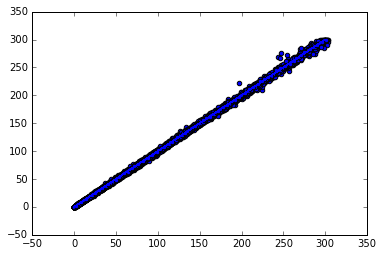

In [7]:
plt.plot(Edft_t,Edft_t)
plt.scatter(Eani_t,Edft_t)
plt.show()

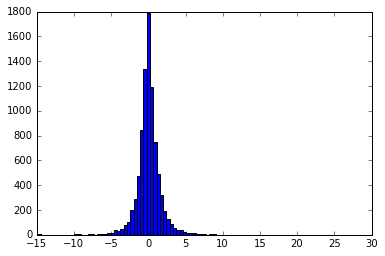

In [8]:
plt.hist(Edft_t-Eani_t,bins=100)
plt.show()